# Asthma_Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing Dataset
ast=pd.read_csv('/content/Asthma disease.csv')
ast

,LGHC Indicator Name,Geography,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
0,Asthma ED Visit Rates,Alameda,2015,18 and Over,Total Population,18 and Over,"6,513",53.1,7,28
1,Asthma ED Visit Rates,Amador,2015,18 and Over,Total Population,18 and Over,151,49.1,7,28
2,Asthma ED Visit Rates,Butte,2015,18 and Over,Total Population,18 and Over,736,43.8,7,28
3,Asthma ED Visit Rates,Calaveras,2015,18 and Over,Total Population,18 and Over,139,42.7,7,28
4,Asthma ED Visit Rates,California,2015,18 and Over,Total Population,18 and Over,"1,17,854",40.0,7,28
...,...,...,...,...,...,...,...,...,...,...
9479,Asthma ED Visit Rates,Tulare,2019,Under 18,Sex,Male,597,81.2,7,28
9480,Asthma ED Visit Rates,Tuolumne,2019,Under 18,Sex,Male,37,90.0,7,28
9481,Asthma ED Visit Rates,Ventura,2019,Under 18,Sex,Male,602,61.0,7,28
9482,Asthma ED Visit Rates,Yolo,2019,Under 18,Sex,Male,135,52.4,7,28


# Data Preprocessing

In [4]:
ast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9484 entries, 0 to 9483
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LGHC Indicator Name  9484 non-null   object 
 1   Geography            9484 non-null   object 
 2   Year                 9484 non-null   int64  
 3   Age Group            9484 non-null   object 
 4   Strata               9484 non-null   object 
 5   Strata Name          9484 non-null   object 
 6   Numerator            9484 non-null   object 
 7   Rate                 9370 non-null   float64
 8   LGHC Indicator ID    9484 non-null   int64  
 9   LGHC Target Rate     9484 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 741.1+ KB


In [5]:
ast.describe()

,Year,Rate,LGHC Indicator ID,LGHC Target Rate
count,9484.000000,9370.000000,9484.0,9484.0
mean,2015.038170,66.991793,7.0,28.0
std,2.584401,86.053953,0.0,0.0
min,2011.000000,5.200000,7.0,28.0
25%,2013.000000,33.800000,7.0,28.0
50%,2015.000000,48.900000,7.0,28.0
75%,2017.000000,71.600000,7.0,28.0
max,2019.000000,4564.100000,7.0,28.0


In [6]:
ast.head()

,LGHC Indicator Name,Geography,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
0,Asthma ED Visit Rates,Alameda,2015,18 and Over,Total Population,18 and Over,"6,513",53.1,7,28
1,Asthma ED Visit Rates,Amador,2015,18 and Over,Total Population,18 and Over,151,49.1,7,28
2,Asthma ED Visit Rates,Butte,2015,18 and Over,Total Population,18 and Over,736,43.8,7,28
3,Asthma ED Visit Rates,Calaveras,2015,18 and Over,Total Population,18 and Over,139,42.7,7,28
4,Asthma ED Visit Rates,California,2015,18 and Over,Total Population,18 and Over,"1,17,854",40.0,7,28


In [7]:
ast.columns

Index(['LGHC Indicator Name', 'Geography', 'Year', 'Age Group', 'Strata',
       'Strata Name', 'Numerator', 'Rate', 'LGHC Indicator ID',
       'LGHC Target Rate'],
      dtype='object')

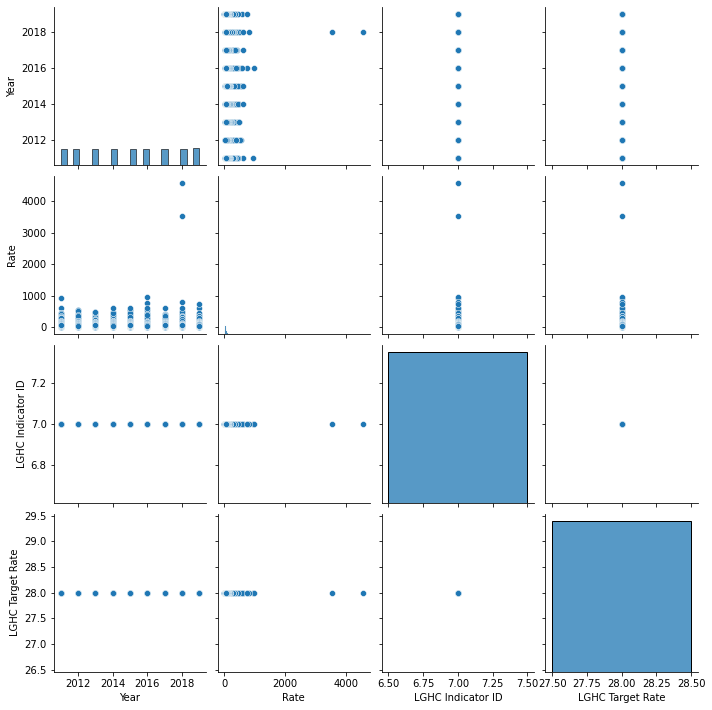

In [8]:
sns.pairplot(ast)

In [9]:
ast.corr()

,Year,Rate,LGHC Indicator ID,LGHC Target Rate
Year,1.000000,-0.020527,NaN,NaN
Rate,-0.020527,1.000000,NaN,NaN
LGHC Indicator ID,NaN,NaN,NaN,NaN
LGHC Target Rate,NaN,NaN,NaN,NaN


In [10]:
ast.isnull().sum()

LGHC Indicator Name      0
Geography                0
Year                     0
Age Group                0
Strata                   0
Strata Name              0
Numerator                0
Rate                   114
LGHC Indicator ID        0
LGHC Target Rate         0
dtype: int64

In [11]:
ast.nunique()

LGHC Indicator Name       1
Geography                59
Year                      9
Age Group                 5
Strata                    3
Strata Name              11
Numerator              2732
Rate                   1797
LGHC Indicator ID         1
LGHC Target Rate          1
dtype: int64

In [12]:
ast.dtypes

LGHC Indicator Name     object
Geography               object
Year                     int64
Age Group               object
Strata                  object
Strata Name             object
Numerator               object
Rate                   float64
LGHC Indicator ID        int64
LGHC Target Rate         int64
dtype: object

In [13]:
X=ast[['LGHC Indicator Name', 'Geography', 'Year', 'Age Group', 'Strata',
       'Numerator', 'Rate', 'LGHC Indicator ID',
       'LGHC Target Rate']]
y=ast['Strata Name']       

# Visualization

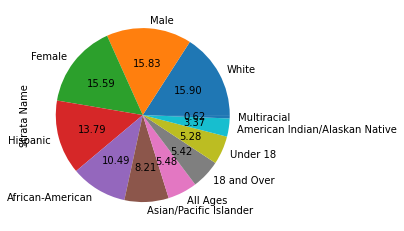

In [14]:
# categorise the Any column in the form of Pie chart
ast['Strata Name'].value_counts().plot(kind='pie',autopct='%2.2f')

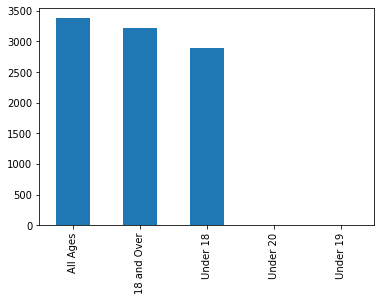

In [15]:
ast['Age Group'].value_counts().plot(kind='bar')

(array([3.209e+03, 0.000e+00, 3.378e+03, 0.000e+00, 0.000e+00, 2.895e+03,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

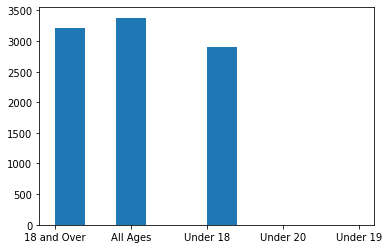

In [16]:
plt.hist(ast['Age Group'])

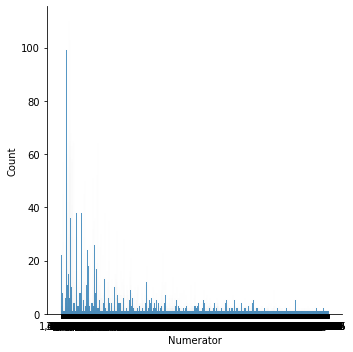

In [17]:
sns.displot(ast['Numerator'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


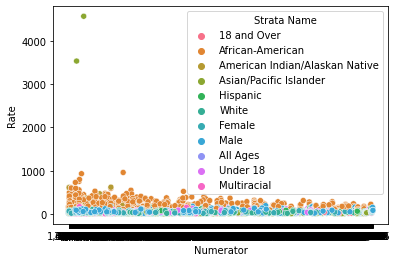

In [18]:
sns.scatterplot(ast['Numerator'],ast['Rate'],hue=ast['Strata Name'])

In [19]:
# find Mean
ast.isna().mean()*100

LGHC Indicator Name    0.000000
Geography              0.000000
Year                   0.000000
Age Group              0.000000
Strata                 0.000000
Strata Name            0.000000
Numerator              0.000000
Rate                   1.202024
LGHC Indicator ID      0.000000
LGHC Target Rate       0.000000
dtype: float64